In [1]:
from IPython.core.display import display, HTML, Javascript
display(HTML("<style>.container { width:90% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
import dionysus
import matplotlib.pyplot as plt
import random
import itertools
from functools import reduce

# style pandas display
pd.set_option('display.max_columns', None)

# matplotlib magic
%matplotlib inline

In [30]:
def noisy_sine(n_steps, radial_noise, amp_noise):
    return np.sin([(16*np.pi*x + radial_noise*random.random())/(n_steps) + amp_noise*random.random() for x in range(n_steps)])

In [31]:
n_steps = 30
rrand = [20, 30, 10, 60]
alpha = [0.6, 0.8, 0.2, 0.9]

d1 = {
    't1': noisy_sine(n_steps, radial_noise=rrand[0], amp_noise=alpha[0]),
    't2': noisy_sine(n_steps, radial_noise=rrand[1], amp_noise=alpha[1]),
    'id': 1,
    'index': range(n_steps)
}

d2 = {
    't1': noisy_sine(n_steps, radial_noise=rrand[2], amp_noise=alpha[2]),
    't2': noisy_sine(n_steps, radial_noise=rrand[3], amp_noise=alpha[3]),
    'id': 2,
    'index': range(n_steps)
}

In [32]:
data = pd.concat(objs=[pd.DataFrame(d1), pd.DataFrame(d2)])

In [33]:
data.shape
data.head()

(60, 4)

,t1,t2,id,index
0,0.800389,0.374344,1,0
1,0.737899,0.389326,1,1
2,-0.312031,-0.789322,1,2
3,-0.377543,-0.078084,1,3
4,0.811131,0.910213,1,4


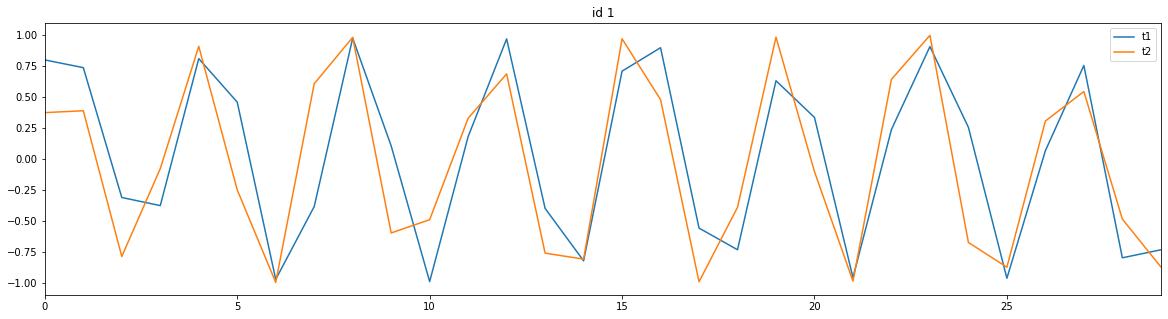

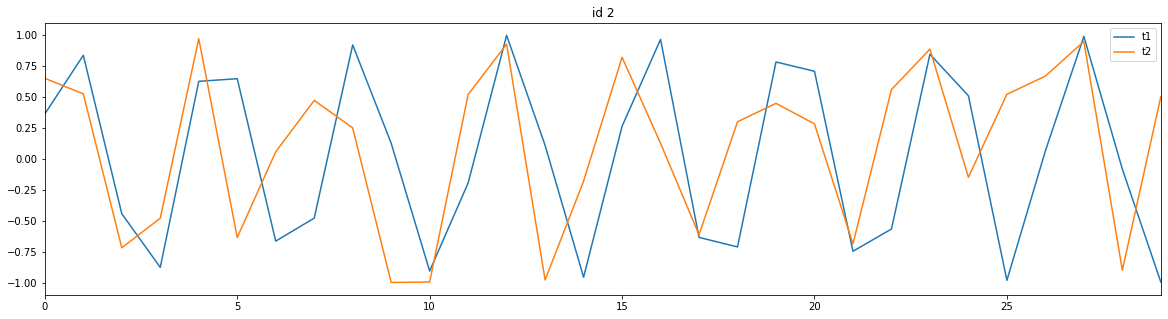

In [34]:
data[
    data['id'] == 1
].drop(['index', 'id'], axis=1).plot(
    kind='line',
    figsize=(20, 5),
    title='id 1'
);

data[
    data['id'] == 2
].drop(['index', 'id'], axis=1).plot(
    kind='line',
    figsize=(20, 5),
     title='id 2'
);

In [35]:
def rolling_window(a, window):
    shape = a.shape[:-1]

In [39]:
np.array[data[data['id']==1].values]

TypeError: 'builtin_function_or_method' object is not subscriptable

In [44]:
a = np.array(data[data['id']==1].values)

In [48]:
shape = a.shape[:-1] + (a.shape[-1] - 2 +1, 2)

In [49]:
shape

(30, 3, 2)

In [52]:
strides = a.strides + (a.strides[-1], )

In [54]:
a_windowed = np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [55]:
a_windowed

array([[[ 0.80038917,  0.37434396],
        [ 0.37434396,  1.        ],
        [ 1.        ,  0.        ]],

       [[ 0.73789892,  0.3893258 ],
        [ 0.3893258 ,  1.        ],
        [ 1.        ,  1.        ]],

       [[-0.31203123, -0.78932235],
        [-0.78932235,  1.        ],
        [ 1.        ,  2.        ]],

       [[-0.37754302, -0.07808358],
        [-0.07808358,  1.        ],
        [ 1.        ,  3.        ]],

       [[ 0.81113144,  0.91021342],
        [ 0.91021342,  1.        ],
        [ 1.        ,  4.        ]],

       [[ 0.45906472, -0.25044253],
        [-0.25044253,  1.        ],
        [ 1.        ,  5.        ]],

       [[-0.97387311, -0.99888825],
        [-0.99888825,  1.        ],
        [ 1.        ,  6.        ]],

       [[-0.38545729,  0.60756949],
        [ 0.60756949,  1.        ],
        [ 1.        ,  7.        ]],

       [[ 0.97630803,  0.98330387],
        [ 0.98330387,  1.        ],
        [ 1.        ,  8.        ]],

       [[ 